# Homework 2: Analyzing Rates of Sea Level Rise
In this homework, you'll investigate sea level change using data from the ECCO state estimate. You'll look at spatial differences over the past few decades and then compare how sea level on the California coast compares to the global mean.

Begin by importing the modules you'll need for this notebook:

In [4]:
# import packages here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4

import os
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm

## Part 1: Download Sea Surface Height Data
To begin this exercise, download all of the available sea surface height data (1992-2017) from the ECCO Version 4 Release 4 output. There are several different variables for sea surface height pertaining to different components and corrections. In this homework, we'll use the `SSHDYN` variable which is equivalent to what satellites would measure from space.

To obtain the data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes.

In [5]:
# define the path to the folder where the SSH data has been download on your machine
ssh_folder = '/Users/alex/Desktop/MS274/demo'

## Part 2: Plot Total Sea Level Rise 1992-2017
As a first look into how sea level has changed in the past several decades, we'll look at the differences between two time periods at the beginning and end of the available model output: January 1992 and January 2017. It is important to use the same month because variations in sea level also have a seasonal cycle (as we'll see below). Begin by reading in the data:

In [10]:
# read in the longitude, latitude, and model ssh grid in January 1992 (SSHDYN_1992_01.nc)

ssh_file = os.path.join(ssh_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN','SSHDYN_1992_01.nc')

ds = xr.open_dataset(ssh_file)
longitude = np.array(ds['longitude'][:])
latitude = np.array(ds['latitude'][:])
ssh = np.array(ds['SSHDYN'][:])
ds.close()
ssh_jan92 = ssh[0, :, :]

# read in the model ssh grid in January 2017 (SSHDYN_2017_01.nc)
ssh_file = os.path.join(ssh_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN','SSHDYN_2017_01.nc')

ds = xr.open_dataset(ssh_file)
ssh = np.array(ds['SSHDYN'][:])
ds.close()
ssh_jan17 = ssh[0, :, :]

Now, make a plot of the difference between January 2017 and January 1992. Be sure to add a colorbar with a divergent colormaps and set the color bounds to be equal in the positive and negative directions.

/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


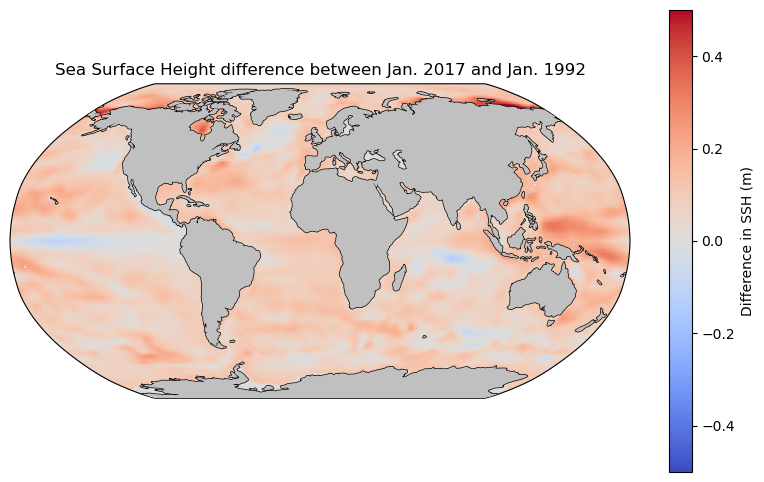

In [27]:
# make a plot of the differences between 2017 and 1992


ssh_diff=ssh_jan17-ssh_jan92

fig = plt.figure(figsize=(10, 6))
ax=plt.axes(projection=ccrs.Robinson())

plt.pcolormesh(longitude, latitude, ssh_diff, cmap='coolwarm', vmin=-0.5, vmax=0.5, transform=ccrs.PlateCarree())

plt.colorbar(label='Difference in SSH (m)')

# add coastlines
ax.add_feature(cfeature.LAND, facecolor='silver',zorder=10)
ax.coastlines()

# format the axes
plt.title('Sea Surface Height difference between Jan. 2017 and Jan. 1992')
plt.show()

### Questions:
Where are the largest increases in sea level observed between these two time periods? Are there any locations on the globe where sea level has fallen? If so, where?

Answer:

The largest increases in sea level observed in this 25 year period are in the Chukchi Sea, Western Warm Pool (Western Pacific), and the Arctic Ocean coastline of Siberia. Yes, there are places where sea level has fallen. These are in the Equatorial Pacific and the central Indian Ocean, mainly.

## Part 3: Create a Timeseries of Sea Surface Height in California
Next, we'll make a timeseries of sea surface height at a point off the California coast near San José. A close location in the model is at 37$^{\circ}$N, 122$^{\circ}$W. Begin by finding the closest row and column in the model grid to this longitude and latitude.

In [29]:
# define the latitude and longitude
lon = -122
lat = 37

# find the row and column closest to the location of the point off the CA coast
# note that you have already read in the longitude and latitude if the grid to make the plot above

lon_index = np.argmin(np.abs((lon) - longitude))

lat_index = np.argmin(np.abs((lat) - latitude))

# sanity check
print('Closest longitude to -122 in the longitude array is', longitude[lon_index])
print('Closest latitude to 37 in the latitude array is', latitude[lat_index])

Closest longitude to -122 in the longitude array is -122.25
Closest latitude to 37 in the latitude array is 36.75


Now, armed with your sample location, loop through each sea surface height file to make a timeseries of sea level rise between 1992 and 2017. Every time you access a file, sample the model grid at the row and column you identified above.

In [32]:
# create a timeseries of ssh at the point above by looping through all of the ssh files
# each time through the loop, sample the ssh grid at the row and column identified above
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second

# make a list to contain the file names
file_list = []

# loop through the 12 months
for year in range (1992,2017+1):
    for month in range(1,13):
        file_list.append(f'SSHDYN_{year}_{month:02d}.nc')

# print out the file names
print(file_list)

['SSHDYN_1992_01.nc', 'SSHDYN_1992_02.nc', 'SSHDYN_1992_03.nc', 'SSHDYN_1992_04.nc', 'SSHDYN_1992_05.nc', 'SSHDYN_1992_06.nc', 'SSHDYN_1992_07.nc', 'SSHDYN_1992_08.nc', 'SSHDYN_1992_09.nc', 'SSHDYN_1992_10.nc', 'SSHDYN_1992_11.nc', 'SSHDYN_1992_12.nc', 'SSHDYN_1993_01.nc', 'SSHDYN_1993_02.nc', 'SSHDYN_1993_03.nc', 'SSHDYN_1993_04.nc', 'SSHDYN_1993_05.nc', 'SSHDYN_1993_06.nc', 'SSHDYN_1993_07.nc', 'SSHDYN_1993_08.nc', 'SSHDYN_1993_09.nc', 'SSHDYN_1993_10.nc', 'SSHDYN_1993_11.nc', 'SSHDYN_1993_12.nc', 'SSHDYN_1994_01.nc', 'SSHDYN_1994_02.nc', 'SSHDYN_1994_03.nc', 'SSHDYN_1994_04.nc', 'SSHDYN_1994_05.nc', 'SSHDYN_1994_06.nc', 'SSHDYN_1994_07.nc', 'SSHDYN_1994_08.nc', 'SSHDYN_1994_09.nc', 'SSHDYN_1994_10.nc', 'SSHDYN_1994_11.nc', 'SSHDYN_1994_12.nc', 'SSHDYN_1995_01.nc', 'SSHDYN_1995_02.nc', 'SSHDYN_1995_03.nc', 'SSHDYN_1995_04.nc', 'SSHDYN_1995_05.nc', 'SSHDYN_1995_06.nc', 'SSHDYN_1995_07.nc', 'SSHDYN_1995_08.nc', 'SSHDYN_1995_09.nc', 'SSHDYN_1995_10.nc', 'SSHDYN_1995_11.nc', 'SSHDYN_1995

In [48]:
# make a list to store the SSH values
ca_SSH_values = []

# loop through each file
for file_name in file_list:
    
    # identify path to the data file
    month_file = os.path.join(ssh_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN',file_name)
    
    # read in the data 
    ds = xr.open_dataset(month_file)
    Ssh_month = np.array(ds['SSHDYN'][:])
    ds.close()

    sanjose_ssh = Ssh_month[0, lat_index, lon_index]
    ca_SSH_values.append(sanjose_ssh)

# convert list to a numpy array
ca_SSH_values = np.array(ca_SSH_values)

# print out the SSH values as a sanity check
print(ca_SSH_values)

[0.18804312 0.23715261 0.24410655 0.21468024 0.1877566  0.16822785
 0.18946613 0.18357678 0.20171733 0.24010612 0.23452561 0.22873873
 0.23177984 0.24684158 0.22190881 0.17446244 0.1347889  0.1439086
 0.16629124 0.20643769 0.21412951 0.23056561 0.23125651 0.2374315
 0.22564395 0.21162458 0.19250168 0.14438052 0.0905756  0.08491755
 0.13662234 0.1789616  0.19817421 0.20043939 0.18479247 0.19293888
 0.23522721 0.23954488 0.23415421 0.17172781 0.1393674  0.10402633
 0.13380958 0.17146629 0.18247075 0.180447   0.18443044 0.18595223
 0.17088373 0.19189775 0.17413354 0.15539131 0.13228524 0.09842738
 0.13039201 0.15102361 0.17597085 0.17508207 0.15593053 0.1649069
 0.18167876 0.16785614 0.13955095 0.13266864 0.14804572 0.15625709
 0.19067933 0.24938469 0.27221996 0.26841241 0.29458556 0.31943211
 0.3194361  0.31850177 0.23250985 0.17377897 0.15719925 0.17289425
 0.16676305 0.19657125 0.20264056 0.17880787 0.16196229 0.13996887
 0.14128715 0.14117669 0.13945904 0.1135877  0.07981729 0.0955024

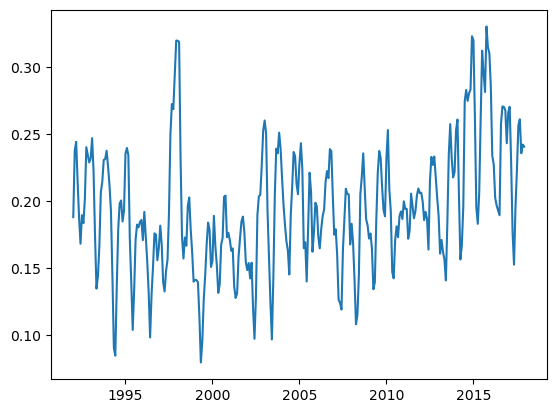

In [49]:
# define a time array for months
months = np.arange(len(file_list))

# convert to "decimal years"
years = 1992 + months/12

plt.plot(years,ca_SSH_values)

## Part 4: Create a Timeseries of Global Mean Sea Surface Height
Next, make a timeseries of sea surface height averaged across the globe. Your loop should look quite similar to that above - you'll just need to make a slight change to average across the whole ocean rather than sampling at a single point.

In [46]:
# create a timeseries of the global mean ssh by looping through all of the ssh files
# each time through the loop, take the mean of the ssh grid at the row and column identified above
# when you take the mean, be sure to exclude 0 values, which pertain to land
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second

# make a list to store the SSH values
mean_SSH_values = []

# loop through each file
for file_name in file_list:
    
    # identify path to the data file
    month_file = os.path.join(ssh_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN',file_name)
    
    # read in the data 
    ds = xr.open_dataset(month_file)
    ssh_grid = np.array(ds['SSHDYN'][:])
    ds.close()

    ssh_grid_masked = np.where(ssh_grid == 0, np.nan, ssh_grid)

    # compute the mean over ocean only
    global_mean_ssh = np.nanmean(ssh_grid_masked)
    mean_SSH_values.append(global_mean_ssh)

# convert list to a numpy array
mean_SSH_values = np.array(mean_SSH_values)

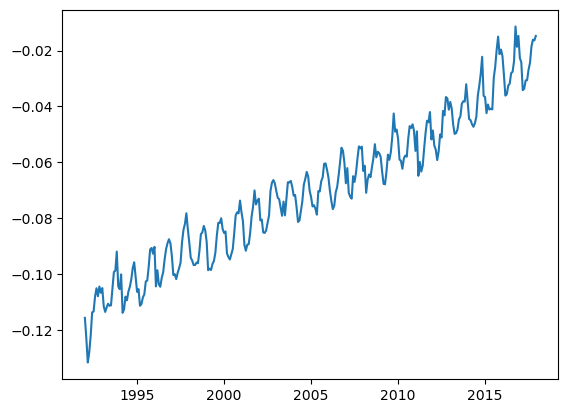

In [47]:
plt.plot(years,mean_SSH_values)

## Part 5: Compute Trends in Sea Surface Height
To compare the two timeseries, compute trends by fitting a line to each timeseries and examining the slope. Print out each trend in mm/yr, rounded to 2 decimal places. Note that the units of sea surface height are in meters.

In [62]:
line_coefficients_ca = np.polyfit(years, ca_SSH_values, deg=1)
line_coefficients_ca=line_coefficients_ca*1000
# print the coefficients
print(f"CA slope: {line_coefficients_ca[0]:.2f} mm/yr  |  intercept: {line_coefficients_ca[1]:.2f} mm")

line_coefficients_glob = np.polyfit(years, mean_SSH_values, deg=1)
line_coefficients_glob=line_coefficients_glob*1000
# print the coefficients
print(f"Global slope: {line_coefficients_glob[0]:.2f} mm/yr  |  intercept: {line_coefficients_glob[1]:.2f} mm")

CA slope: 2.08 mm/yr  |  intercept: -3971.94 mm
Global slope: 3.38 mm/yr  |  intercept: -6840.48 mm


In [65]:
ca_rate = line_coefficients_ca[0]   # mm/yr
glob_rate = line_coefficients_glob[0] # mm/yr

percent_slower = (glob_rate - ca_rate) / glob_rate * 100

print(f"CA SLR is {percent_slower:.1f}% slower than global SLR")

CA SLR is 38.5% slower than global SLR


### Question:
How does the trend in sea level rise in California compare to the global mean rate?

Answer: Sea level rise off San Jose, California was 38.5% slower in the 25-year period from 1992 to 2017 than the global average.

## Part 6: Plot the Timeseries of Sea Surface Height
Finally, plot the two timeseries on the same plot along with their trend lines. Be sure to label your axes and include a legend.

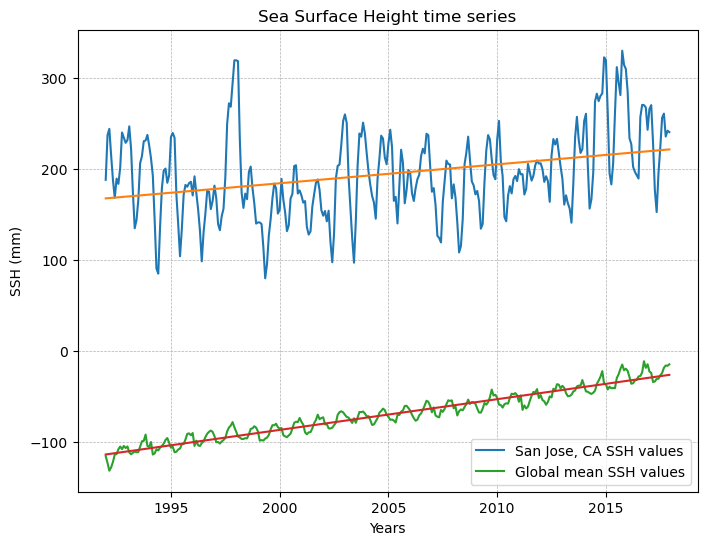

In [69]:
fig = plt.figure(figsize=(8,6))

# plot the data
plt.plot(years, ca_SSH_values*1000, label ='San Jose, CA SSH values')

# plot the trend line
plt.plot(years, line_coefficients_ca[0]*years + line_coefficients_ca[1])

# plot the data
plt.plot(years, mean_SSH_values*1000, label = 'Global mean SSH values')

# plot the trend line
plt.plot(years, line_coefficients_glob[0]*years + line_coefficients_glob[1])

plt.title('Sea Surface Height time series')
plt.ylabel('SSH (mm)')
plt.xlabel('Years')
plt.grid(linestyle='--',linewidth=0.5)
plt.legend()
plt.show()

### Questions:

How do the timeseries for Calfiornia and the global mean compare? Comment on their variability. What are the two highest years of sea level in California? What oceanographic phenomenon happened during this time?

Answer: The SJ, CA timeseries is much more variable than the global mean. The two highest years of sea level for California were in 1997 and 2015, both strong El Niño events.